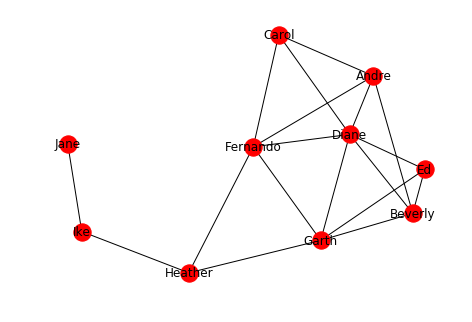

In [2]:
import networkx as net
import matplotlib.pyplot as plot
g = net.Graph()
g.add_edges_from([("Beverly","Andre"),("Beverly","Ed"),("Beverly","Diane"),("Beverly","Garth")])
g.add_edges_from([("Andre","Carol"),("Andre","Fernando"),("Andre","Diane")])
g.add_edges_from([("Ed","Diane"),("Ed","Garth")])
g.add_edges_from([("Diane","Carol"),("Diane","Fernando"),("Diane","Garth")])
g.add_edges_from([("Carol","Fernando")])
g.add_edges_from([("Garth","Fernando"),("Garth","Heather")])
g.add_edges_from([("Fernando","Heather")])
g.add_edges_from([("Heather","Ike")])
g.add_edges_from([("Ike","Jane")])
#net.draw_networkx(g)
net.draw(g, pos=net.spring_layout(g), labels={"Beverly":"Beverly","Andre":"Andre",
                                              "Ed":"Ed","Garth":"Garth","Carol":"Carol",
                                             "Fernando":"Fernando","Diane":"Diane","Heather":"Heather",
                                             "Ike":"Ike","Jane":"Jane"})
plot.axis('off')
plot.show()